# Adagrad-RMSProp-Adam

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X =  np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
Y = -1*X + 2
Y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

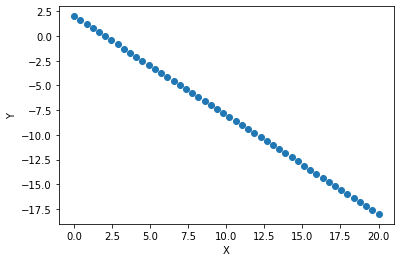

In [4]:
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y");

## Adagrad

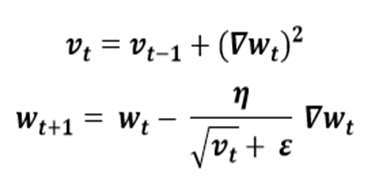

In [5]:
# Create a function to take x Matrix, y points, learning_rate(alpha) and max number of iterations() to get theta_vec

def Linear_Regression_Adagrad_Batch_GD(features_matrix, y_vec, alpha=.001 , epsilon = 1e-8 , iterations=1000):
    
    # prepare features_matrix
    if features_matrix.ndim == 1:
        features_matrix = features_matrix[:,np.newaxis]   
    features_matrix = np.insert(features_matrix, 0 , np.ones(features_matrix.shape[0]), axis = 1)
    
    # initial parameters
    theta_vec = np.zeros(features_matrix.shape[1])
    vt = 0
    
    # make temp lists Just for visualization
    cost_lst = []
    GD_list = []
    all_theta_vecs = []
    h_theta_lst =[]

    for t in range(1, iterations+1):
        ############### appending theta vector to list ################
        all_theta_vecs.append(theta_vec)
        
        ############### Calculate the predicted output ################
        h_theta = features_matrix @ theta_vec
        h_theta_lst.append(h_theta)
        
        ###################### Calculate loss #########################
        error_vec = h_theta - y_vec
        cost = ((np.linalg.norm(error_vec)) ** 2) / (2* y_vec.shape[0])
        cost_lst.append(cost)
        
        ################# Calculate gradient descent ##################
        GD = (features_matrix.T @ error_vec) / y_vec.shape[0]
        GD_list.append(round(np.linalg.norm(GD),8))
        
        ########### calculate vt for adaptive learning rate ###########
        vt = vt +  GD **2
        
        ##################### Update theta vector #####################
        theta_vec = theta_vec - (alpha * GD) / (np.sqrt(vt) + epsilon )
        
        
        # Stop conditions
        if len(cost_lst) > 2:
            # Check minimum gradient
            if np.linalg.norm(GD) < 0.0001 or np.linalg.norm(GD) > 1e100:
                break
            # Check cost
            elif abs(cost_lst[-1] - cost_lst[-2]) < 1e-11:
                break
            # Check theta
            elif abs(np.linalg.norm(theta_vec) - np.linalg.norm(all_theta_vecs[-1])) < 1e-11:
                break
        
    #return
    return theta_vec, cost_lst, GD_list, np.array(all_theta_vecs), h_theta_lst

In [6]:
# ploting function
def plot(theta_v, cost, GD_list , all_theta_vecs , alpha , title ="Title", size = (22,5)):
    fig,axes = plt.subplots(1,4,figsize=size)
    plt.suptitle(title,fontsize=20);
 #-----------------------------------------------------------------------#   
    axes[0].plot(np.arange(len(GD_list)),GD_list, label ="alpha = {}".format(alpha),
                             color='blue',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[0].set_xlabel("Number of iterations")
    axes[0].set_ylabel("Gradient")
    axes[0].legend()
#-----------------------------------------------------------------------#
    axes[1].plot(all_theta_vecs[:,0],cost, label ="alpha = {}".format(alpha),
                          color='red',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[1].set_xlabel("theta0")
    axes[1].set_ylabel("Loss")
    axes[1].legend()
#-----------------------------------------------------------------------#
    axes[2].plot(all_theta_vecs[:,1],cost, label ="alpha = {}".format(alpha),
                          color='red',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[2].set_xlabel("theta1")
    axes[2].set_ylabel("Loss")
    axes[2].legend()
#-----------------------------------------------------------------------#
    axes[3].plot(np.arange(len(cost)), cost, label ="alpha = {}".format(alpha),
                          color='g',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[3].set_xlabel("Number of iterations")
    axes[3].set_ylabel("Loss")
    axes[3].legend()

In [7]:
# ploting with function
def plot_Adagrad_with_iter_alpha(x,y, iterations=1000, alpha=.0001,  epsilon = 1e-10 , title ="Title"):
    
    # calling the regression function
    theta_v, cost, GD_list, all_theta_vecs, h_theta_lst = Linear_Regression_Adagrad_Batch_GD(
        x, y, alpha = alpha, epsilon = epsilon, iterations = iterations)
    
    # calling the plotting function
    plot(theta_v, cost, GD_list , all_theta_vecs , alpha , title = title, size = (22,5))
    
    # calculate R2 using sklearn library   
    y_pred = x*theta_v[1] + theta_v[0]
    r2 =r2_score(y,y_pred)
    print("R2 : ",r2)
    
    # print theta vec
    print("Theta vector :",theta_v)

In [8]:
theta_vec, cost_lst, GD_list, all_theta_vecs, h_theta_lst = Linear_Regression_Adagrad_Batch_GD(
    X, Y, alpha=.7 , epsilon = 1e-8 , iterations=10000)

In [9]:
theta_vec

array([ 1.99971297, -0.99997817])

R2 :  0.9999999993873014
Theta vector : [ 1.99971297 -0.99997817]


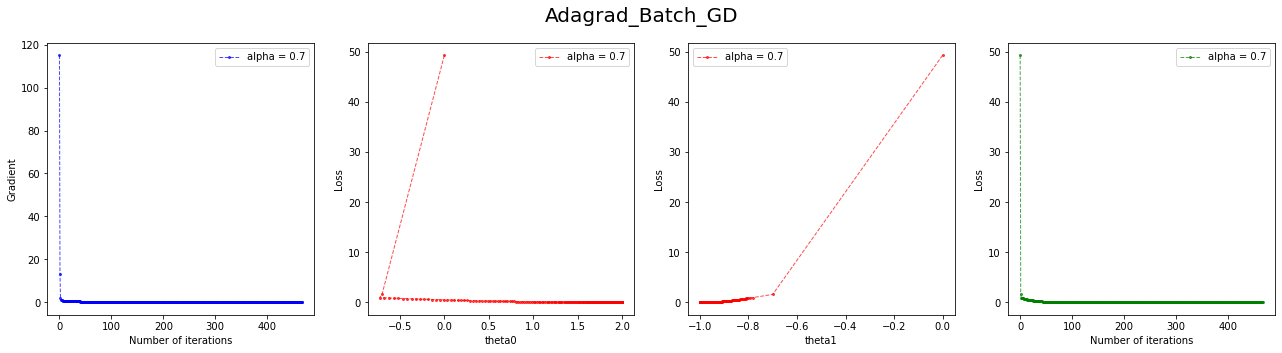

In [10]:
plot_Adagrad_with_iter_alpha(X,Y, iterations=1000, alpha=.7, epsilon = 1e-8 , title ="Adagrad_Batch_GD")

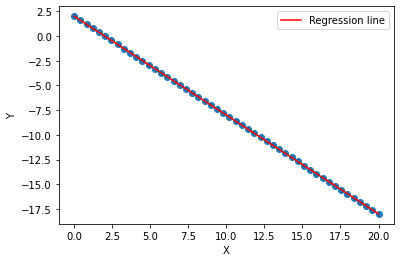

In [11]:
# plotting optimal regression line
plt.scatter(X,Y)
plt.plot(X, theta_vec[0]+theta_vec[1]*X, color ='r', label ='Regression line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend();

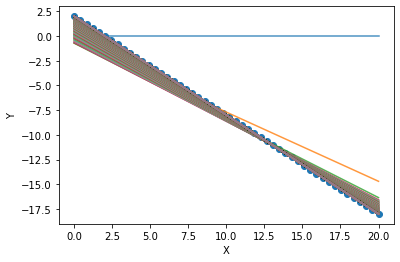

In [12]:
# plotting all regression lines
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
for theta_v in all_theta_vecs:
    plt.plot(X,theta_v[0] + theta_v[1]*X, alpha=0.8 )

### Trying different hyperparammeters

R2 :  0.9933967110288637
Theta vector : [ 1.0577119  -0.92833973]


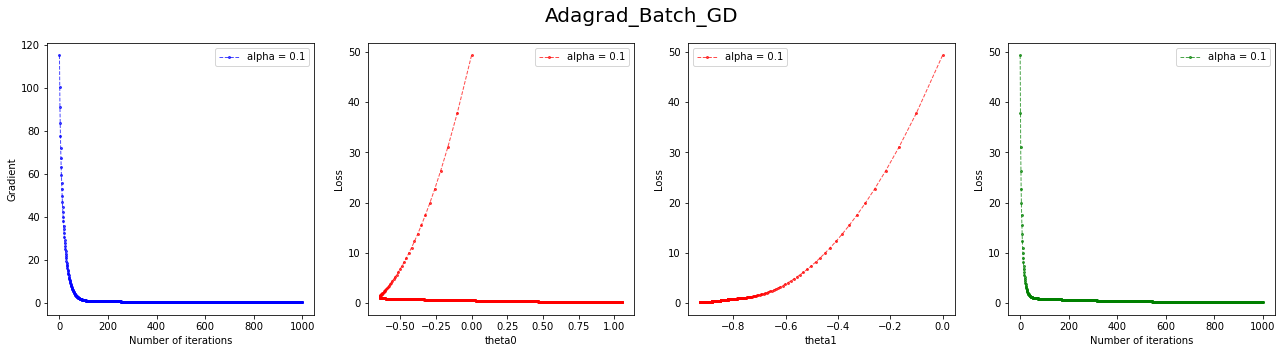

In [13]:
plot_Adagrad_with_iter_alpha(X,Y, iterations=1000, alpha=.1, epsilon = 1e-8 , title ="Adagrad_Batch_GD")

- lower alpha gives soomth learning

R2 :  0.9933915425977449
Theta vector : [ 1.05734257 -0.92831232]


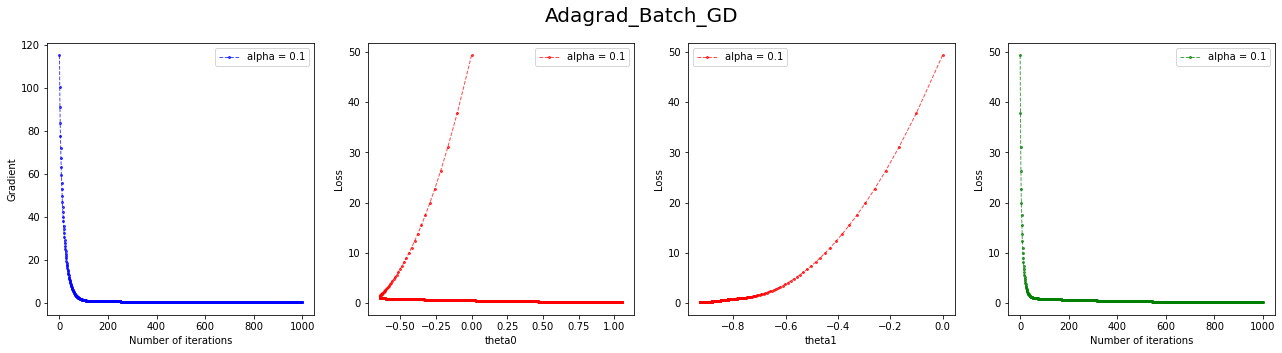

In [14]:
plot_Adagrad_with_iter_alpha(X,Y, iterations=1000, alpha=.1, epsilon = 1e-2 , title ="Adagrad_Batch_GD")

- by changing epsilon there is no big difference between two trails

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

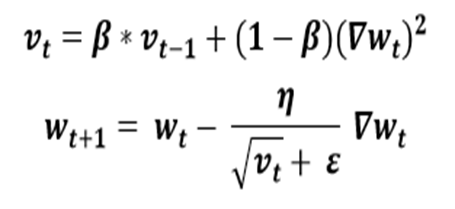

In [15]:
# Create a function to take x Matrix, y points, learning_rate(alpha) and max number of iterations() to get theta_vec

def Linear_Regression_RMSProp_Batch_GD(features_matrix, y_vec, alpha=.001, beta = 0.9 , epsilon = 1e-8 , iterations=1000):
    
    # prepare features_matrix
    if features_matrix.ndim == 1:
        features_matrix = features_matrix[:,np.newaxis]   
    features_matrix = np.insert(features_matrix, 0 , np.ones(features_matrix.shape[0]), axis = 1)
    
    # initial parameters
    theta_vec = np.zeros(features_matrix.shape[1])
    vt = 0
    
    # make temp lists Just for visualization
    cost_lst = []
    GD_list = []
    all_theta_vecs = []
    h_theta_lst =[]

    for t in range(1, iterations+1):
        ############### appending theta vector to list ################
        all_theta_vecs.append(theta_vec)
        
        ############### Calculate the predicted output ################
        h_theta = features_matrix @ theta_vec
        h_theta_lst.append(h_theta)
        
        ###################### Calculate loss #########################
        error_vec = h_theta - y_vec
        cost = ((np.linalg.norm(error_vec)) ** 2) / (2 * y_vec.shape[0])
        cost_lst.append(cost)
        
        ################# Calculate gradient descent ##################
        GD = (features_matrix.T @ error_vec) / y_vec.shape[0]
        GD_list.append(round(np.linalg.norm(GD),8))
        
        ########### calculate vt for adaptive learning rate ###########
        vt = beta * vt +  ((1 - beta) * GD **2)
        
        ##################### Update theta vector #####################
        theta_vec = theta_vec - (alpha * GD) / (np.sqrt(vt) + epsilon )
        
        
        # Stop conditions
        if len(cost_lst) > 2:
            # Check minimum gradient
            if np.linalg.norm(GD) < 0.0001 or np.linalg.norm(GD) > 1e100:
                break
            # Check cost
            elif abs(cost_lst[-1] - cost_lst[-2]) < 1e-11:
                break
            # Check theta
            elif abs(np.linalg.norm(theta_vec) - np.linalg.norm(all_theta_vecs[-1])) < 1e-11:
                break
        
    # Return
    return theta_vec, cost_lst, GD_list, np.array(all_theta_vecs), h_theta_lst

In [16]:
# ploting with function
def plot_RMSProp_with_iter_alpha_beta(x,y, iterations=1000, alpha=.0001,beta = 0.9, epsilon = 1e-10 , title ="Title"):
    
    # calling the regression function
    theta_v, cost, GD_list, all_theta_vecs, h_theta_lst = Linear_Regression_RMSProp_Batch_GD(
        x, y, alpha = alpha, beta = beta, epsilon = epsilon, iterations = iterations)
    
    # calling the plotting function
    plot(theta_v, cost, GD_list , all_theta_vecs , alpha , title = title, size = (22,5))
    
    # calculate R2 using sklearn library   
    y_pred = x*theta_v[1] + theta_v[0]
    r2 =r2_score(y,y_pred)
    print("R2 : ",r2)
    
    # print theta vec
    print("Theta vector :",theta_v)

In [17]:
theta_vec, cost_lst, GD_list, all_theta_vecs, h_theta_lst = Linear_Regression_RMSProp_Batch_GD(
    X, Y, alpha=.7, beta = 0.999 , epsilon = 1e-8 , iterations=1000)

In [18]:
theta_vec

array([ 1.99971504, -0.99997834])

R2 :  0.9999999993961481
Theta vector : [ 1.99971504 -0.99997834]


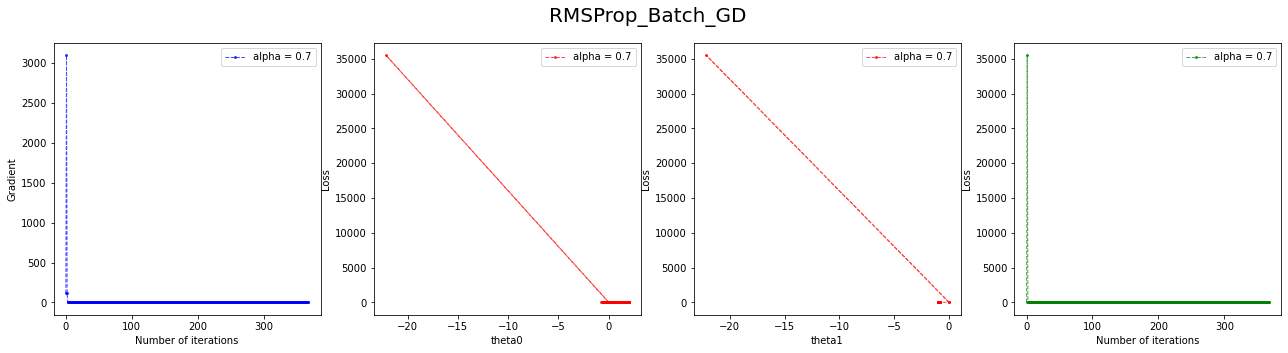

In [19]:
plot_RMSProp_with_iter_alpha_beta(X,Y, iterations=1000, alpha=.7,beta = 0.999, epsilon = 1e-8 , title ="RMSProp_Batch_GD")

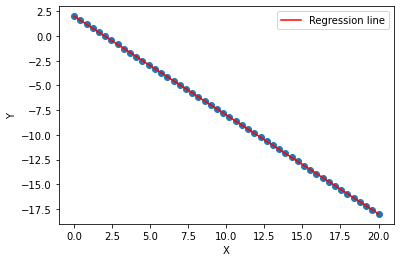

In [20]:
# plotting optimal regression line
plt.scatter(X,Y)
plt.plot(X, theta_vec[0]+theta_vec[1]*X, color ='r', label ='Regression line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend();

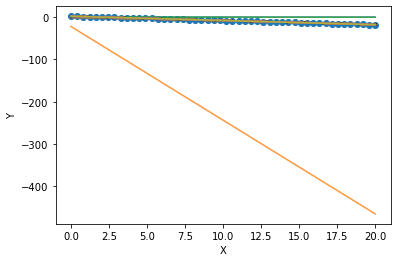

In [21]:
# plotting all regression lines
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
for theta_v in all_theta_vecs:
    plt.plot(X,theta_v[0] + theta_v[1]*X, alpha=0.8 )

### Trying different hyperparammeters

R2 :  0.9887808823921356
Theta vector : [ 1.94994962 -1.04999617]


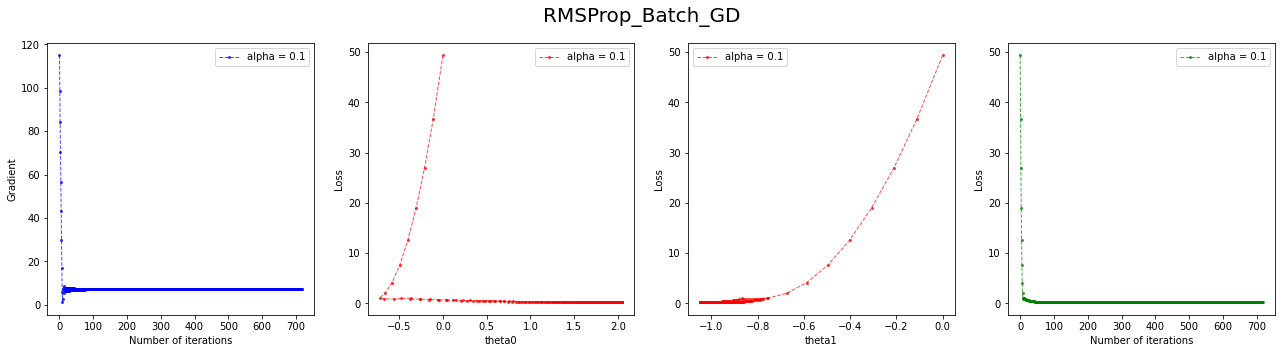

In [22]:
plot_RMSProp_with_iter_alpha_beta(X,Y, iterations=1000, alpha=.1,beta = 0.2, epsilon = 1e-8 , title ="RMSProp_Batch_GD")

- by lowering beta, the algorithm takes more trails to stop and get low R2

### comparison between RMSprop and Adagrad

R2 :  0.9999999993873014
Theta vector : [ 1.99971297 -0.99997817]


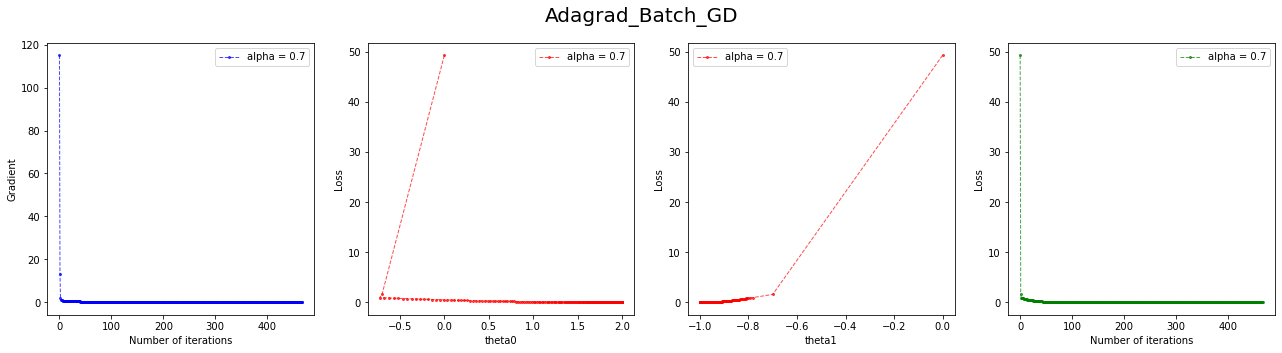

In [23]:
plot_Adagrad_with_iter_alpha(X,Y, iterations=1000, alpha=.7, epsilon = 1e-8 , title ="Adagrad_Batch_GD")

R2 :  0.9999999993961481
Theta vector : [ 1.99971504 -0.99997834]


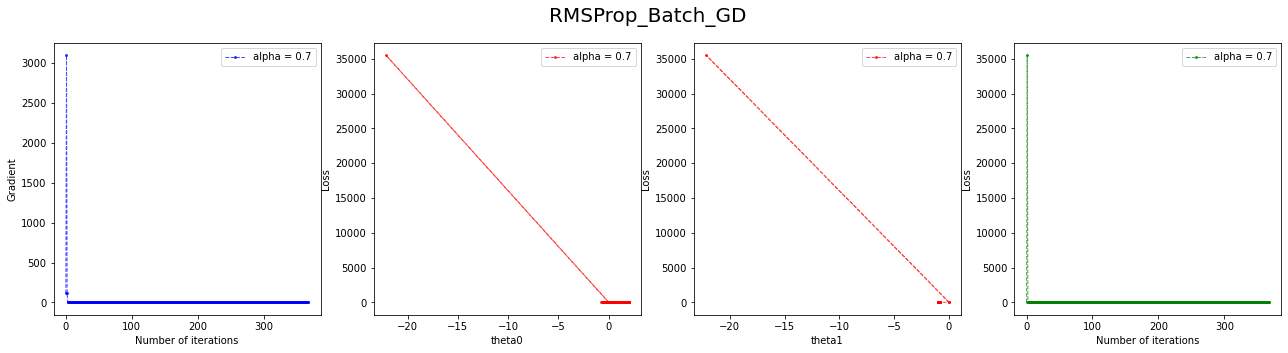

In [24]:
plot_RMSProp_with_iter_alpha_beta(X,Y, iterations=1000, alpha=.7,beta = 0.999, epsilon = 1e-8 , title ="RMSProp_Batch_GD")

- For the same alpha and maximum number of iteration PMSProp get higher results with lower number of iterations.

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

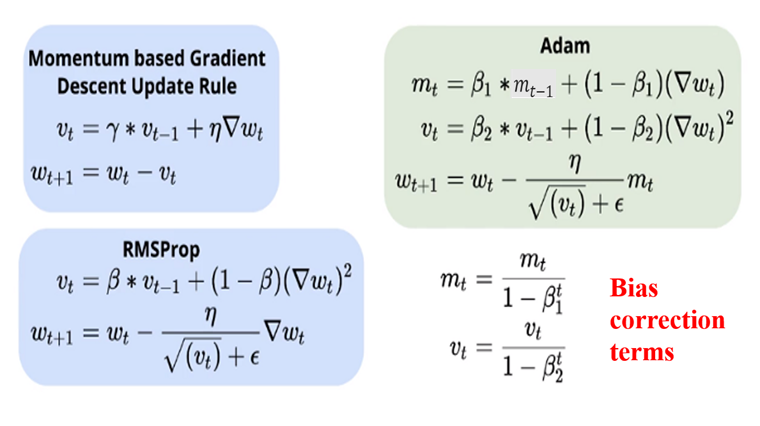

In [25]:
# Create a function to take x Matrix, y points, learning_rate(alpha) and max number of iterations() to get theta_vec

def Linear_Regression_Adam_Batch_GD(features_matrix, y_vec,
                                    alpha=.001, beta_1=0.9, beta_2=0.999, epsilon = 1e-8 , iterations=1000):
    
    # prepare features_matrix
    if features_matrix.ndim == 1:
        features_matrix = features_matrix[:,np.newaxis]   
    features_matrix = np.insert(features_matrix, 0 , np.ones(features_matrix.shape[0]), axis = 1)
    
    # initial parameters
    theta_vec = np.zeros(features_matrix.shape[1])
    mt = 0
    vt = 0
    
    # make temp lists Just for visualization
    cost_lst = []
    GD_list = []
    all_theta_vecs = []
    h_theta_lst =[]

    for t in range(1, iterations+1):
        ############### appending theta vector to list ################
        all_theta_vecs.append(theta_vec)
        
        ############### Calculate the predicted output ################
        h_theta = features_matrix @ theta_vec
        h_theta_lst.append(h_theta)
        
        ###################### Calculate loss #########################
        error_vec = h_theta - y_vec
        cost = ((np.linalg.norm(error_vec)) ** 2) / (2 * y_vec.shape[0])
        cost_lst.append(cost)
        
        ################# Calculate gradient descent ##################
        GD = (features_matrix.T @ error_vec) / y_vec.shape[0]
        GD_list.append(round(np.linalg.norm(GD),8))
        
        ################## calculate mt for momentum ##################
        mt = beta_1 * mt +  ((1 - beta_1) * GD )
        
        ########### calculate vt for adaptive learning rate ###########
        vt = beta_2 * vt +  ((1 - beta_2) * (GD **2))
        
        ###################### Bais correction ########################
        Mt = mt / (1 - beta_1**t)
        Vt = vt / (1 - beta_2**t)
        
        ##################### Update theta vector #####################
        theta_vec = theta_vec - (alpha * Mt) / (np.sqrt(Vt) + epsilon )
        
        
        # Stop conditions
        if len(cost_lst) > 2:
            # Check minimum gradient
            if np.linalg.norm(GD) < 0.0001 or np.linalg.norm(GD) > 1e100:
                break
            # Check cost
            elif abs(cost_lst[-1] - cost_lst[-2]) < 1e-11:
                break
            # Check theta
            elif abs(np.linalg.norm(theta_vec) - np.linalg.norm(all_theta_vecs[-1])) < 1e-11:
                break
        
    #return
    return theta_vec, cost_lst, GD_list, np.array(all_theta_vecs), h_theta_lst

In [26]:
# ploting with function
def plot_Adam_with_iter_alpha_beta(x,y, iterations=1000,
                                   alpha=.0001,beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-8 , title ="Title"):
    
    # calling the regression function
    theta_v, cost, GD_list, all_theta_vecs, h_theta_lst = Linear_Regression_Adam_Batch_GD(
        x, y, alpha = alpha, beta_1 = beta_1, beta_2 = beta_2, epsilon = epsilon, iterations = iterations)
    
    # calling the plotting function
    plot(theta_v, cost, GD_list , all_theta_vecs , alpha , title = title, size = (22,5))
    
    # calculate R2 using sklearn library   
    y_pred = x*theta_v[1] + theta_v[0]
    r2 =r2_score(y,y_pred)
    print("R2 : ",r2)
    
    # print theta vec
    print("Theta vector :",theta_v)

In [27]:
theta_vec, cost_lst, GD_list, all_theta_vecs, h_theta_lst = Linear_Regression_Adam_Batch_GD(X, Y,
                                    alpha=.1, beta_1=0.9, beta_2=0.999, epsilon = 1e-8 , iterations=1000)

R2 :  0.9999999995855314
Theta vector : [ 1.99976393 -0.99998204]


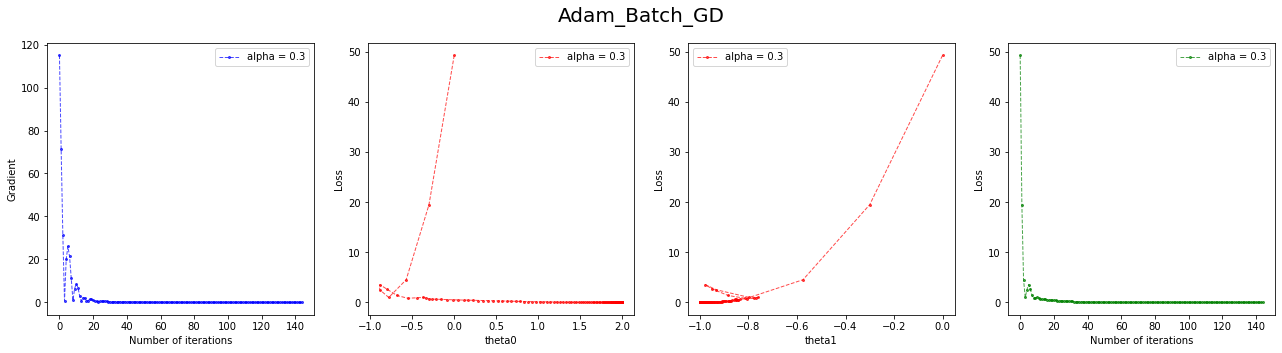

In [28]:
plot_Adam_with_iter_alpha_beta(X,Y, iterations=1000,
                                   alpha=.3,beta_1 = 0.6, beta_2 = 0.999, epsilon = 1e-8 , title ="Adam_Batch_GD")

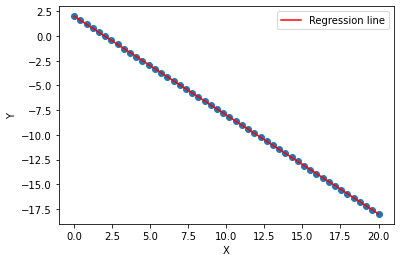

In [29]:
# plotting optimal regression line
plt.scatter(X,Y)
plt.plot(X, theta_vec[0]+theta_vec[1]*X, color ='r', label ='Regression line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend();

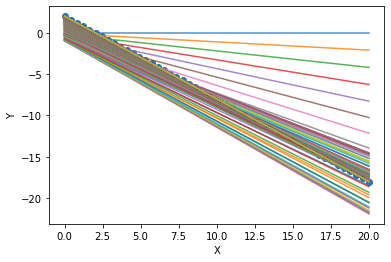

In [30]:
# plotting all regression lines
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
for theta_v in all_theta_vecs:
    plt.plot(X,theta_v[0] + theta_v[1]*X, alpha=0.8 )

### Trying different hyperparammeters

R2 :  0.9999999994559712
Theta vector : [ 1.99972957 -0.9999794 ]


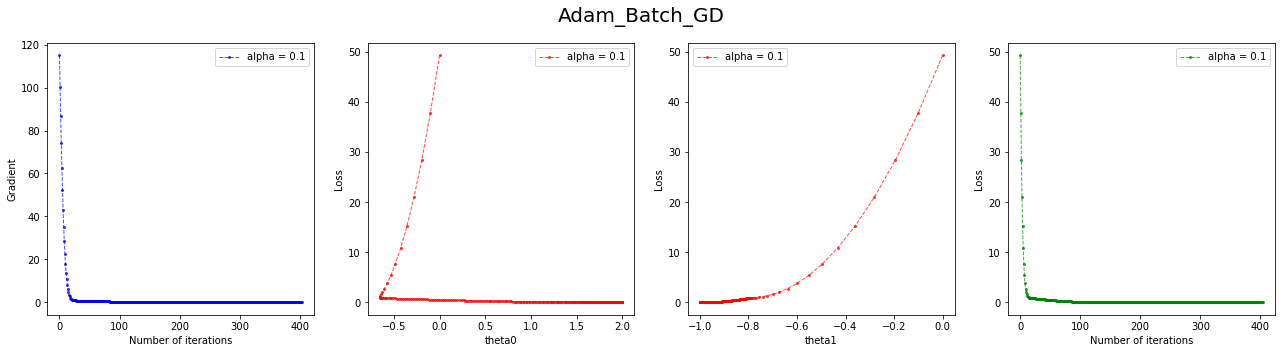

In [31]:
plot_Adam_with_iter_alpha_beta(X,Y, iterations=1000,
                                   alpha=.1,beta_1 = 0.1, beta_2 = 0.999, epsilon = 1e-8 , title ="Adam_Batch_GD")

R2 :  0.9999999994477491
Theta vector : [ 1.99972749 -0.99997928]


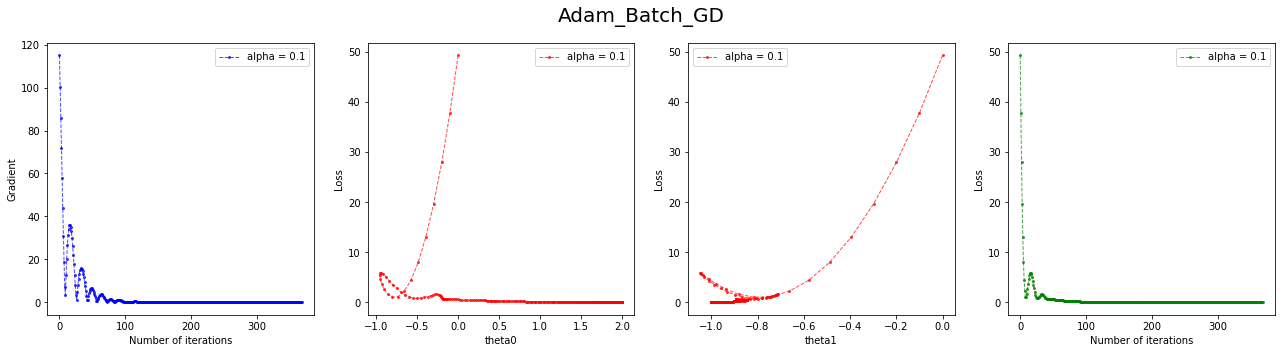

In [32]:
plot_Adam_with_iter_alpha_beta(X,Y, iterations=1000,
                                   alpha=.1,beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-8 , title ="Adam_Batch_GD")

- By lowering momentum term learning became more smooth and has less fluctuation

R2 :  0.9656030551451517
Theta vector : [ 2.08754888 -0.91245112]


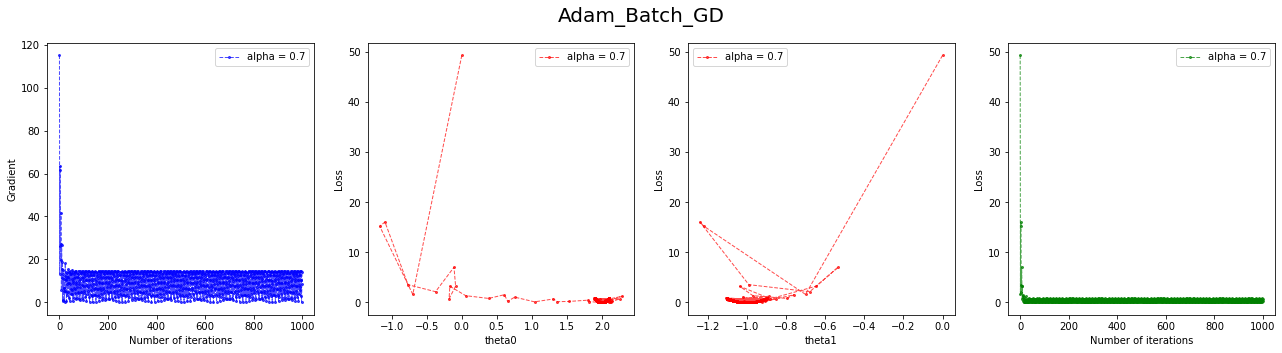

In [33]:
plot_Adam_with_iter_alpha_beta(X,Y, iterations=1000,
                                   alpha=.7,beta_1 = 0.7, beta_2 = 0.7, epsilon = 1e-8 , title ="Adam_Batch_GD")

- beta 2  is more sensitive when lowring it we get more fluctuation

# Comparison between three algorithms

R2 :  0.9999999993873014
Theta vector : [ 1.99971297 -0.99997817]


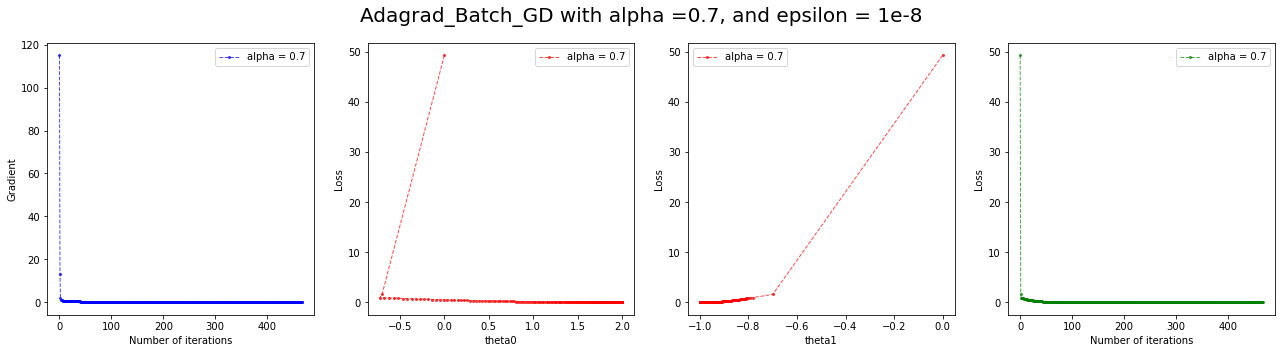

In [34]:
plot_Adagrad_with_iter_alpha(X,Y, iterations=1000, alpha=.7, epsilon = 1e-8 , 
                             title ="Adagrad_Batch_GD with alpha =0.7, and epsilon = 1e-8")

R2 :  0.9999999993961481
Theta vector : [ 1.99971504 -0.99997834]


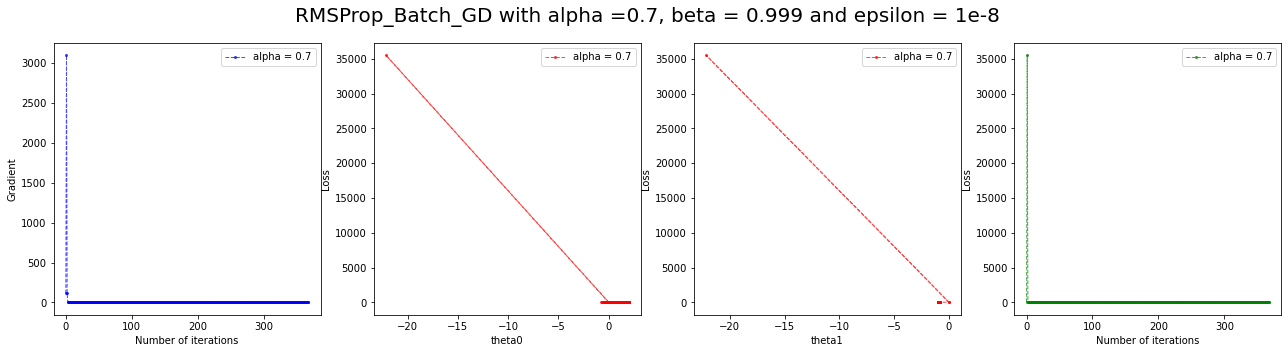

In [35]:
plot_RMSProp_with_iter_alpha_beta(X,Y, iterations=1000, alpha=.7,beta = 0.999, epsilon = 1e-8 , 
                                  title ="RMSProp_Batch_GD with alpha =0.7, beta = 0.999 and epsilon = 1e-8")

R2 :  0.9999999997008729
Theta vector : [ 1.99980012 -0.99998436]


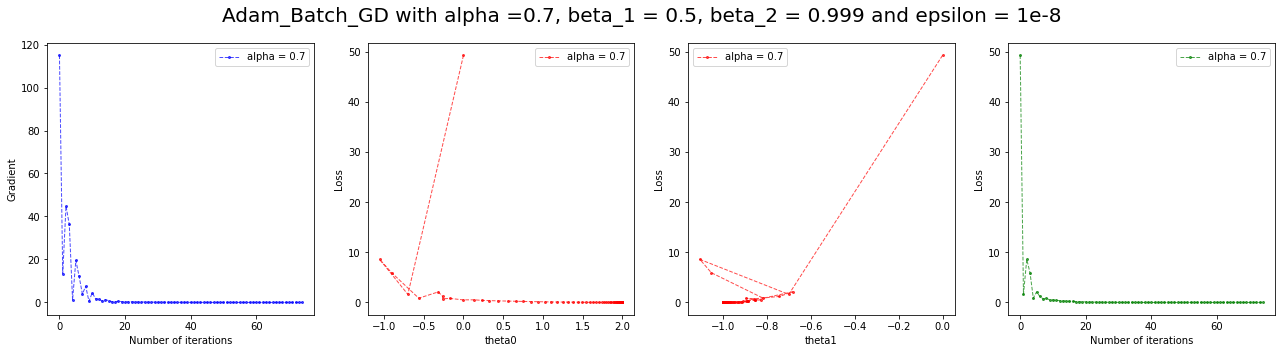

In [36]:
plot_Adam_with_iter_alpha_beta(X,Y, iterations=1000,
                                   alpha=.7,beta_1 = 0.5, beta_2 = 0.999, epsilon = 1e-8 , 
                               title ="Adam_Batch_GD with alpha =0.7, beta_1 = 0.5, beta_2 = 0.999 and epsilon = 1e-8")

##  By use the same learning rate (alpha = 0.7) in all algorithms and same adaptive learning rate  (beta = 0.999)
### The differences between three algorithms in this data are:
- Adam is the fastest with lower than 70 iterations and has the best accuracy with R2 = 0.9999999997008729
- Adagrad is the slowest one with 400 iterations with the lowest accuracy, R2 = 0.99999999938730141 
- RMSProp is something between Adagrad and Adam with a number of iterations lower than 400 and medium accuracy between Adam and Adagrad, R2 = 0.9999999993961481
------------
- Adam has more overshoots near minimum gradient due to momentum term